In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
df = pd.read_csv('corona_north_macedonia.csv')

In [3]:
x_data = np.array(list(range(len(df))))
y_data = np.array(df['vkupno_novi'])
x = np.linspace(1,len(df),len(df))


In [4]:
kvadratni = np.polyfit(x_data,y_data, 2)

In [5]:
y = kvadratni[0]*(x_data**2) + kvadratni[1]*x_data + kvadratni[2]

In [6]:
def func(x, a, b, c):
    return a * np.exp(b * x) + c

In [7]:
def func_1(x, b):
    return np.exp(b * x)

In [8]:
popt, pcov = curve_fit(func, x_data, y_data)

In [9]:
popt1, pcov1 = curve_fit(func_1, x_data, y_data)

In [10]:
y_exp = func(x_data, *popt)

In [11]:
y_exp_1 = func_1(x_data, *popt1)

In [12]:
testirani = 2240 + 406

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text yticklabel objects>)

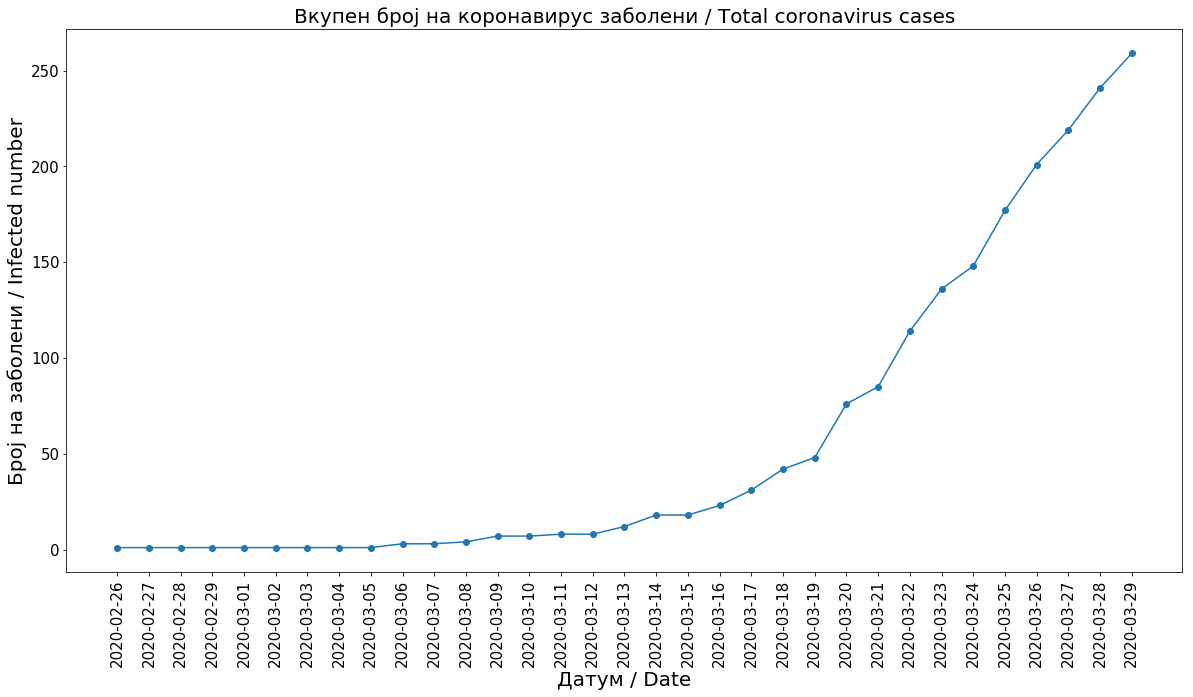

In [13]:
plt.figure(figsize=(20,10))
plt.plot(df['datum'],df['vkupno_novi'], '-o')
plt.title("Вкупен број на коронавирус заболени / Total coronavirus cases", fontsize=20)
plt.xlabel("Датум / Date", fontsize=20)
plt.ylabel("Број на заболени / Infected number", fontsize=20)
plt.xticks(rotation = 'vertical', fontsize=15)
plt.yticks(fontsize=15)

(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text yticklabel objects>)

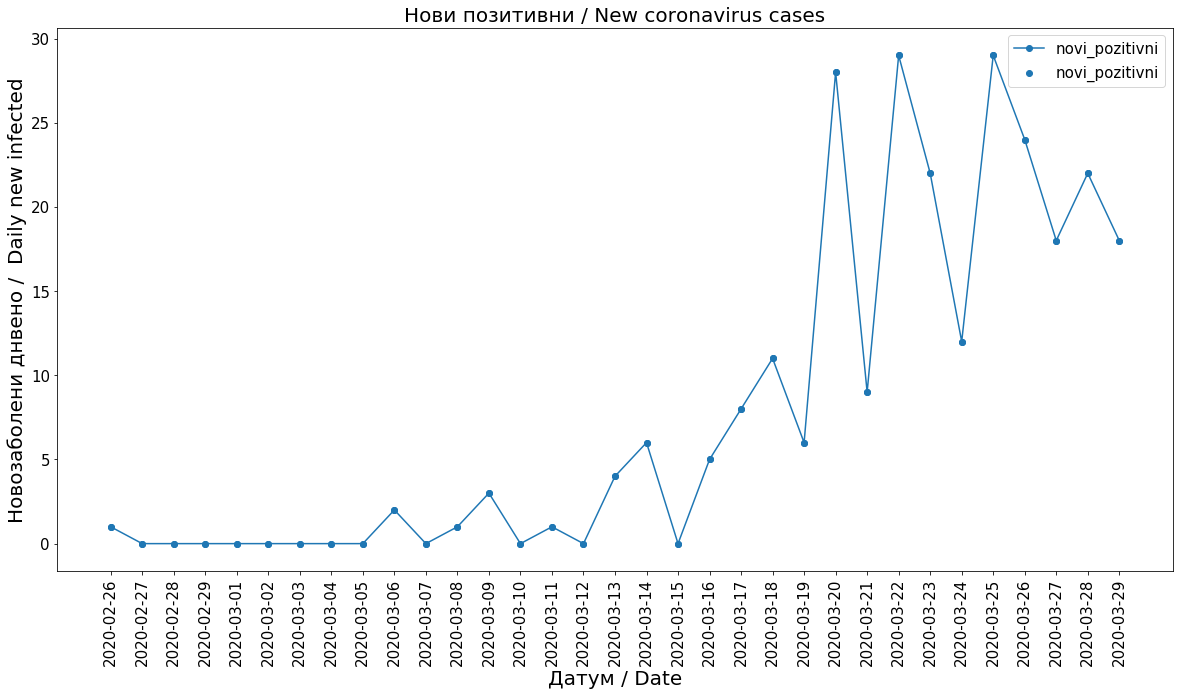

In [14]:
plt.figure(figsize=(20,10))
plt.plot(df['datum'],df['novi_pozitivni'], '-o')
plt.scatter(df['datum'],df['novi_pozitivni'])
plt.legend(fontsize=15)
plt.title("Нови позитивни / New coronavirus cases", fontsize=20)
plt.xlabel("Датум / Date", fontsize=20)
plt.ylabel("Новозаболени днвено /  Daily new infected", fontsize=20)
plt.xticks(fontsize=15, rotation = 'vertical')
plt.yticks(fontsize=15)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text yticklabel objects>)

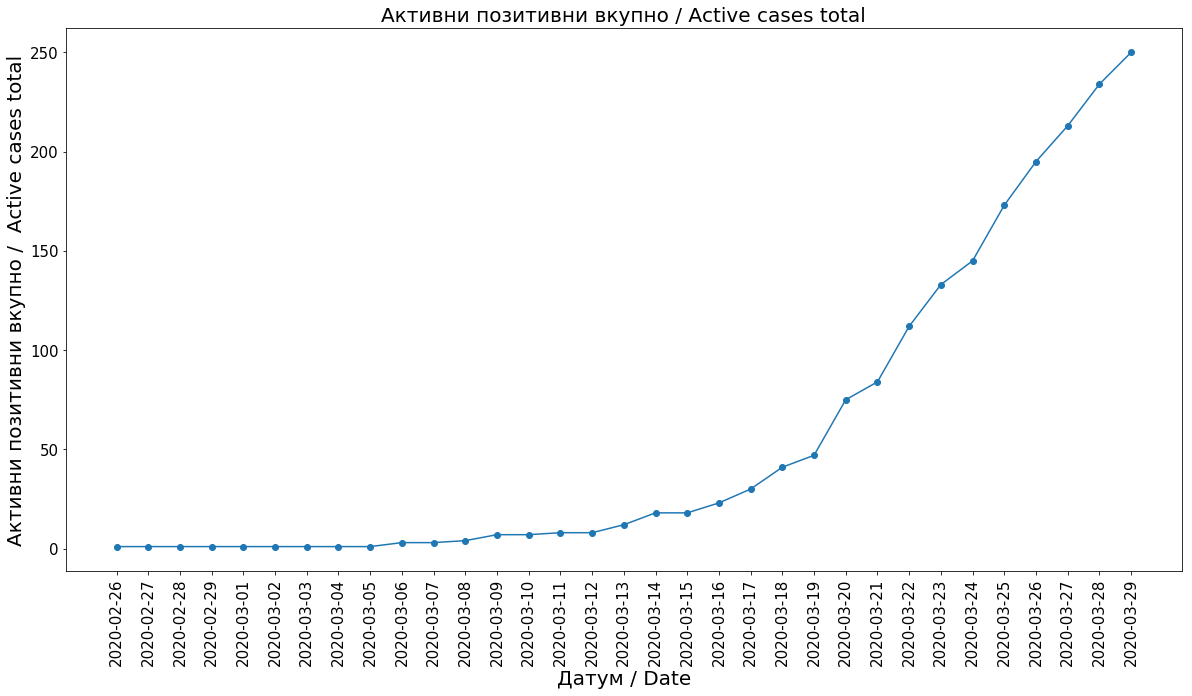

In [15]:
plt.figure(figsize=(20,10))
plt.plot(df['datum'],df['active'], '-o')
plt.title("Активни позитивни вкупно / Active cases total", fontsize=20)
plt.xlabel("Датум / Date", fontsize=20)
plt.ylabel("Активни позитивни вкупно /  Active cases total", fontsize=20)
plt.xticks(fontsize=15, rotation = 'vertical')
plt.yticks(fontsize=15)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350.]),
 <a list of 9 Text yticklabel objects>)

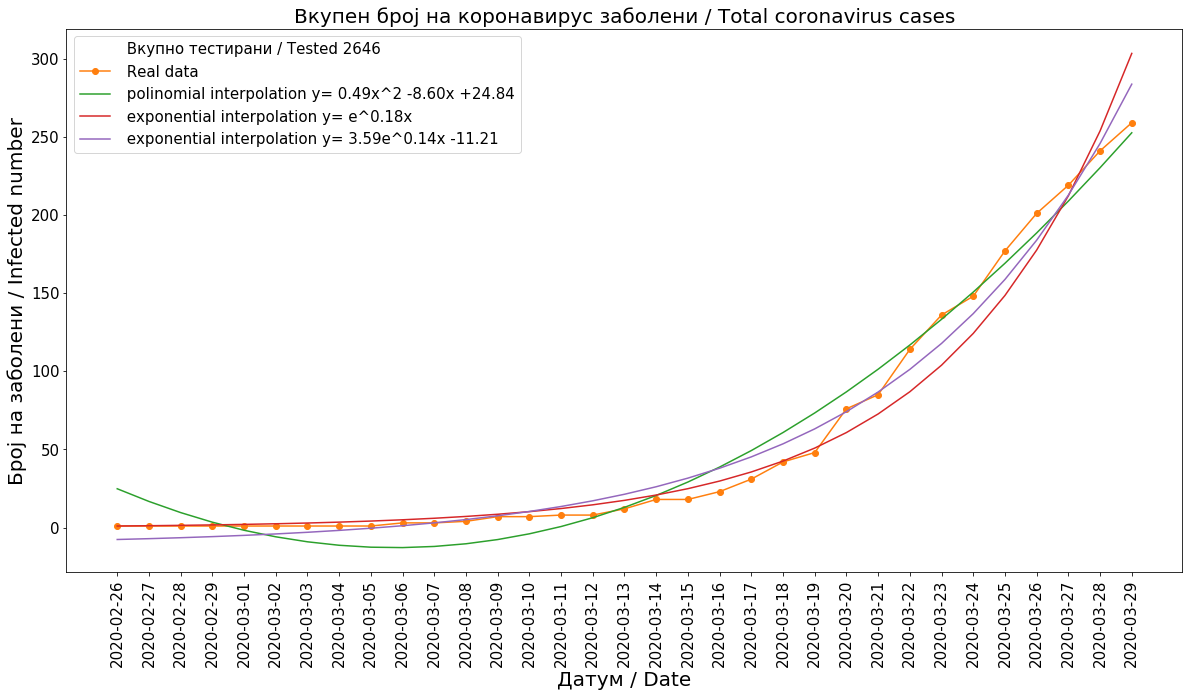

In [17]:
plt.figure(figsize=(20,10))
plt.plot([], [], ' ', label=" Вкупно тестирани / Tested %d " %testirani)
plt.plot(df['datum'],df['vkupno_novi'],'-o', label = ' Real data')
plt.plot(df['datum'],y, label = ' polinomial interpolation y= %2.2fx^2 %2.2fx %+2.2f' % tuple(kvadratni))
plt.plot(df['datum'], y_exp_1, label = ' exponential interpolation y= e^%2.2fx' % tuple(popt1))
plt.plot(df['datum'], y_exp, label = ' exponential interpolation y= %2.2fe^%2.2fx %+2.2f' % tuple(popt))
plt.legend(fontsize=15)
plt.title("Вкупен број на коронавирус заболени / Total coronavirus cases", fontsize=20)
plt.xlabel("Датум / Date", fontsize=20)
plt.ylabel("Број на заболени / Infected number", fontsize=20)
plt.xticks(fontsize=15, rotation = 'vertical')
plt.yticks(fontsize=15)
